In [50]:
from sklearn.datasets import load_wine
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]], shape=(178, 13)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [51]:
wine.data.shape, wine.data.ndim

((178, 13), 2)

In [52]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [53]:
import pandas as pd
wine_df = pd.DataFrame(wine.data,columns=wine.feature_names)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [54]:
# 컬럼중에서 x y 가 될만한 컬럼을 찾아보기.... 선형성이 있는지 시각적으로 또는 상관계수를 통해서 학습할수 있는 데이터찾기

<Axes: xlabel='total_phenols', ylabel='flavanoids'>

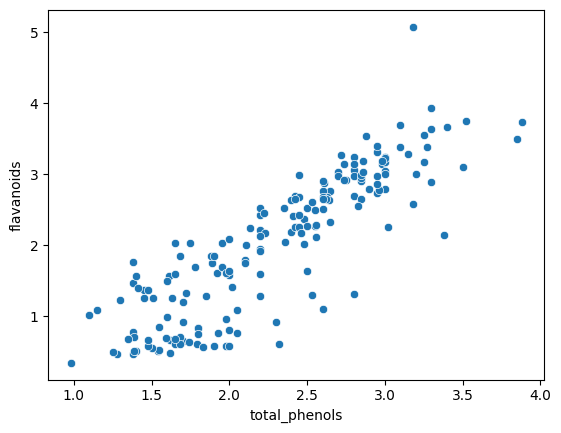

In [55]:
import seaborn as sns
wine.feature_names
# total_phenols 'flavanoids'
sns.scatterplot(data=wine_df,x='total_phenols' ,y='flavanoids')

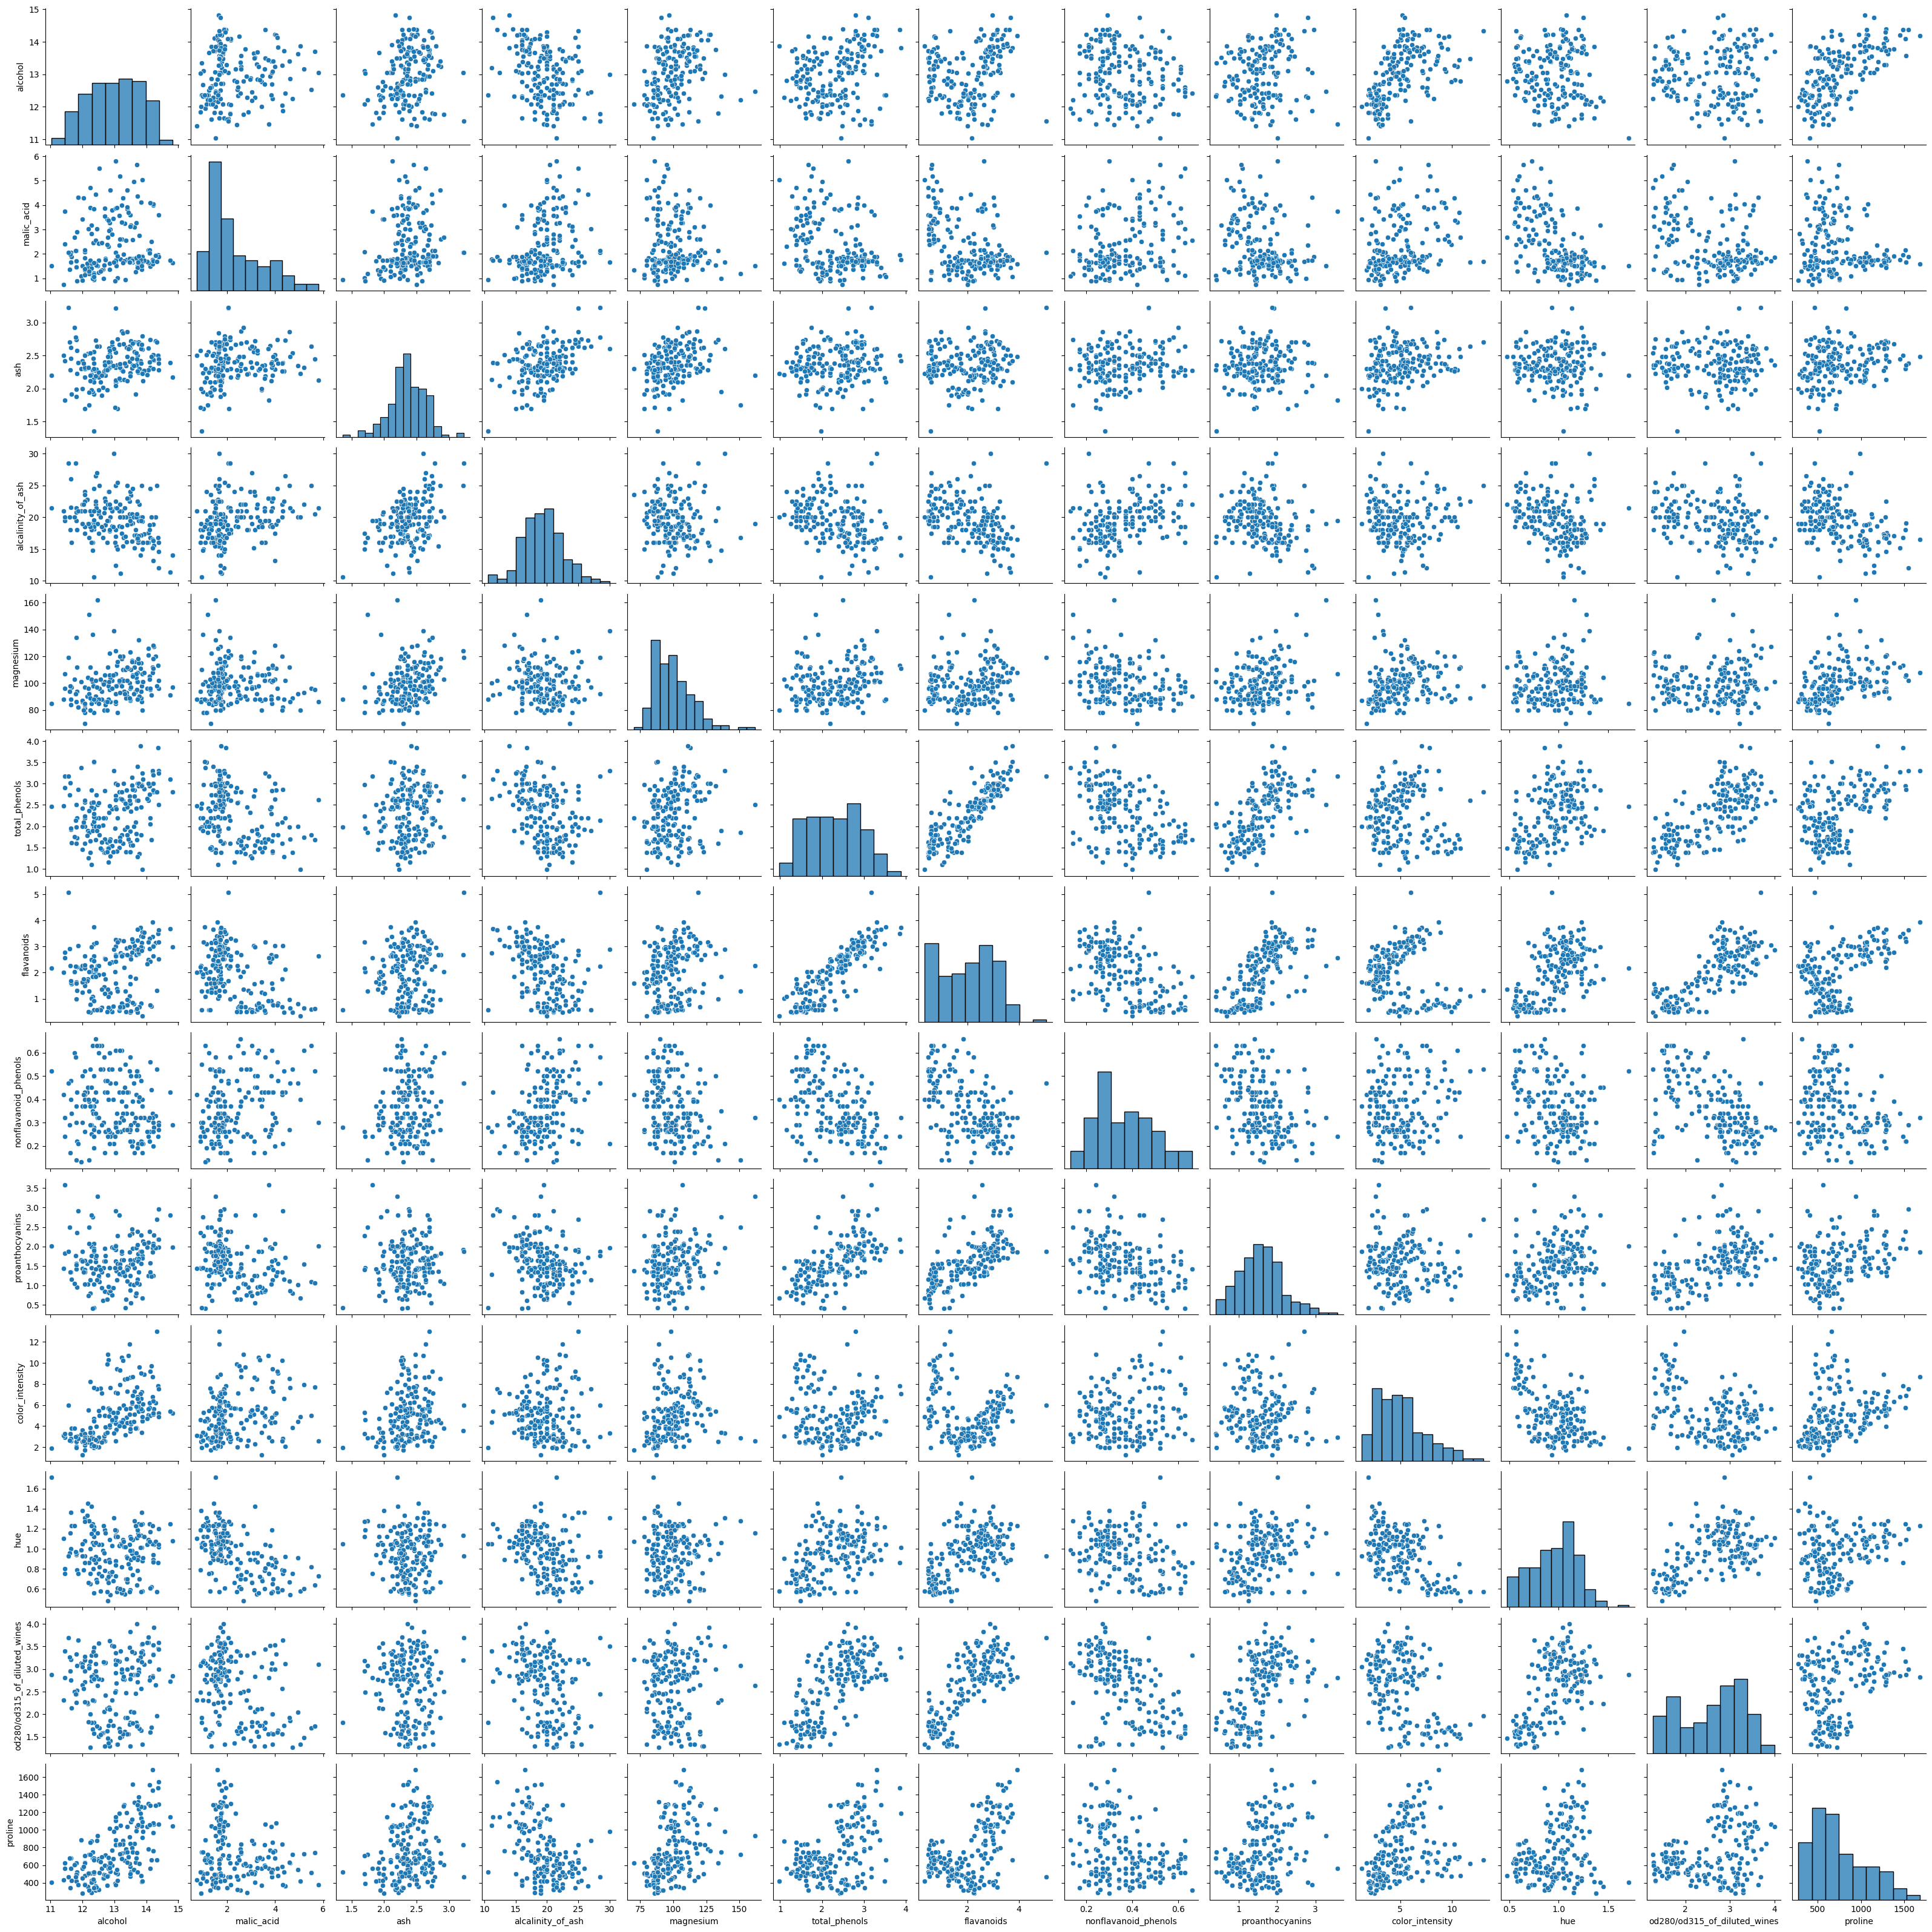

In [56]:
import seaborn as sns
sns.pairplot(data= wine_df)

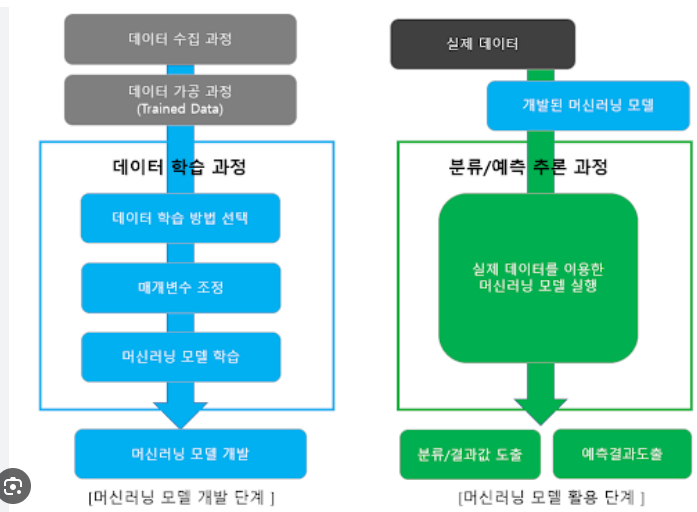

선형관계가 있는 데이터 셋을 찾는다(2개  x y)

학습용 테스트용 데이터 분리

모델 선택

학습

평가

In [69]:
from sklearn.model_selection import train_test_split
# flavanoids', y='proline
X = wine_df[['flavanoids']]
y = wine_df.proline
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)
len(x_train), len(y_train), len(x_test), len(y_test)

(142, 142, 36, 36)

In [70]:
# 모델 선택 및 학습
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [71]:
# 평가  결정계수
lr.score(x_test, y_test)

0.26525756348477847

In [87]:
# 비선형으로 try
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=7)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
lr2 = LinearRegression()
lr2.fit(x_train_poly,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [88]:
lr2.score(x_test_poly,y_test)

0.271077059321846

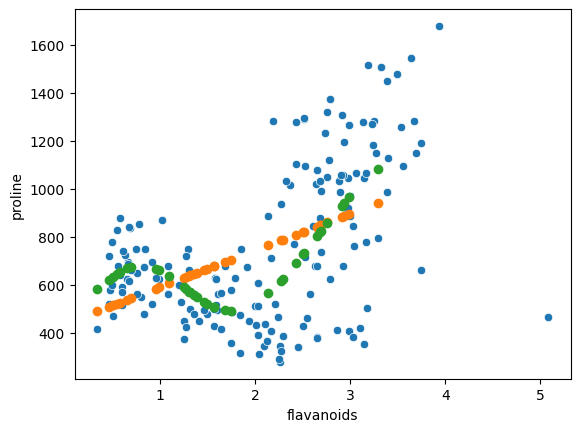

In [89]:
# wine_df  flavanoids  proanthocyanins
import matplotlib.pylab as plt
y_test_predict = lr.predict(x_test)
y_test_poly_predict = lr2.predict(x_test_poly)
sns.scatterplot(data=wine_df,x='flavanoids', y='proline')
# len(x_test), len(y_test_predict)
plt.scatter(x = x_test, y = y_test_predict)
plt.scatter(x = x_test, y = y_test_poly_predict)